In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INITIAL_PROPELANT_WEIGHT = 0.30  #Kg
SAMPLE_RATE = 80
time_constant = 1/SAMPLE_RATE
dataFile = 'march_17.csv'

In [3]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0)]

In [5]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)
filtered

array([0.0000e+00, 9.5000e-01, 8.5000e-01, 9.6000e-01, 1.0500e+00,
       1.2300e+00, 1.3400e+00, 1.3500e+00, 1.4600e+00, 1.4500e+00,
       1.6600e+00, 1.7200e+00, 1.9100e+00, 2.1800e+00, 2.1000e+00,
       2.2800e+00, 2.5000e+00, 2.3100e+00, 2.7200e+00, 2.9600e+00,
       3.4500e+00, 3.9400e+00, 4.6000e+00, 5.2100e+00, 5.7800e+00,
       6.4900e+00, 7.3700e+00, 8.2900e+00, 9.9400e+00, 1.0780e+01,
       1.2770e+01, 1.5930e+01, 1.9110e+01, 2.2560e+01, 2.9170e+01,
       3.3120e+01, 9.8280e+01, 1.0638e+02, 1.1251e+02, 1.1545e+02,
       1.1870e+02, 1.2254e+02, 1.2755e+02, 1.3213e+02, 1.3407e+02,
       1.3727e+02, 1.4265e+02, 1.4685e+02, 1.4891e+02, 1.5121e+02,
       1.5143e+02, 1.5348e+02, 1.5447e+02, 1.5369e+02, 1.5455e+02,
       1.5481e+02, 1.5455e+02, 1.5447e+02, 1.5571e+02, 1.5534e+02,
       1.5371e+02, 1.5300e+02, 1.5524e+02, 1.5413e+02, 1.5415e+02,
       1.5781e+02, 1.5788e+02, 1.5875e+02, 1.6009e+02, 1.6176e+02,
       1.5980e+02, 1.5606e+02, 1.5788e+02, 1.6162e+02, 1.6353e

In [6]:
#filtered = np.delete(filtered, [1,2,3,4,10])
burnTime = filtered.size * time_constant

In [7]:
t = np.linspace(0, burnTime, filtered.size)
thrust = filtered

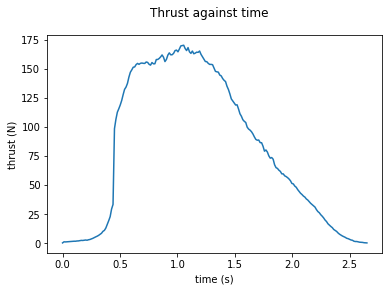

In [8]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [9]:
#total impulse
#TODO --> Use trapezoidal rule for getting the total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [10]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [11]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		214.29	N-sec 
Specific Impulse:	714.31	N-sec/Kg 
Average Thrust:		80.87	N
Motor Class:		H


In [12]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

Enter rasp file name kok


In [13]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

Enter Motor Diameter (mm):  00
Input motor Length (mm):  00
Input motor delays separated by dashes or P(plugged) for none:  00
Propellant Weight (Kg):  00
Motor Total Weight (Kg):  00


In [14]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

24

In [15]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [16]:
f.close()